<a href="https://colab.research.google.com/github/ErnestGeo24/Esercizio_Geopandas_-_3_ripasso_verifica/blob/main/verifica_sommativa_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
!pip install contextily

In [7]:
import geopandas as gpd
import contextily as ctx
import pandas as pd

8. convertire il dataframe in un geodataframe

In [ ]:
colonnine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/colonnine_ricarica_geo.csv")
colonnine

In [ ]:
quartieriMI = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
quartieriMI

In [ ]:
colonnine =colonnine.drop(colonnine[colonnine['LAT_Y_4326']== '-'].index)
gdf = gpd.GeoDataFrame(colonnine, geometry = gpd.points_from_xy(colonnine['LONG_X_4326'], colonnine['LAT_Y_4326']), crs = 'EPSG:4326')
gdf

9. visualizzaare i dati su una mappa di Milano. Fare in modo che i punti siano colorati di nero

In [38]:
gdf3857 = gdf.to_crs(3857)

In [11]:
quartieriMI3857 = quartieriMI.to_crs(3857)

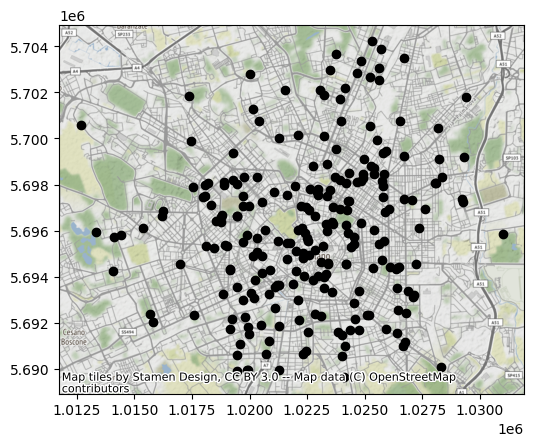

In [43]:
gdf3857 = gdf.to_crs(3857)
ax = gdf3857.plot(color='k')
ctx.add_basemap(ax=ax)

10. visualizzare su una mappa anche i confini di milano. colorare i confini di rosso

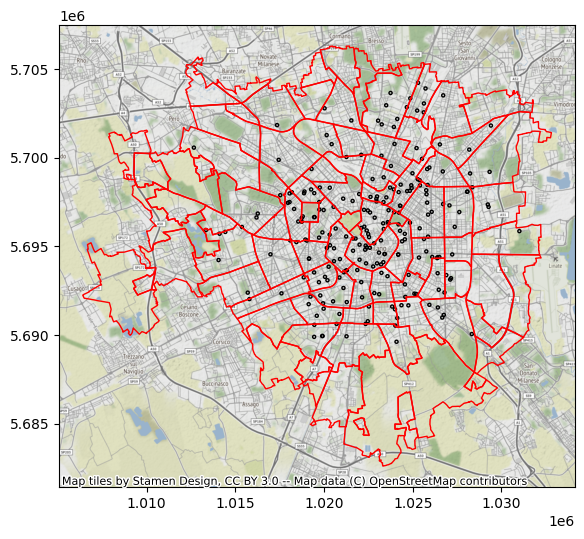

In [46]:
ax = gdf3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6),markersize = 5)
quartieriMI3857.plot(ax=ax,edgecolor =  "red", facecolor = "None",figsize=(12,6),markersize = 5)
ctx.add_basemap(ax)

11. visualizzare le colonnine di ricarica presenti in un quartiere inserito dal'utente

In [ ]:
join = gpd.sjoin(gdf,quartieriMI,predicate ='intersects',how = 'left')
join

inserisci il quartiere: duomo


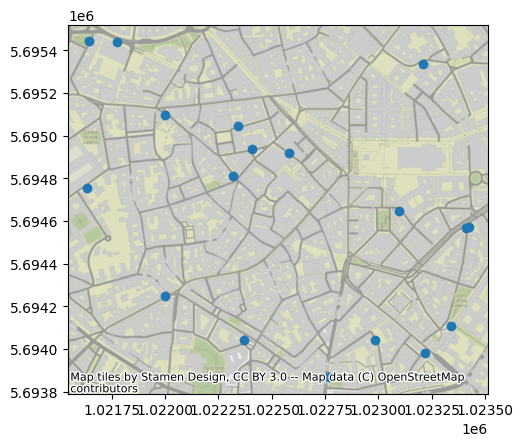

In [62]:
qu = str(input('inserisci il quartiere: ')).upper()
join3857 = join.to_crs(3857)
ax = join3857[join3857['NIL'].str.contains(qu)].plot()
ctx.add_basemap(ax=ax)

12. visualizzare le colonnine di ricarica nei quartieri che confinano con il quartiere inserito dall'utente

In [ ]:
quartconf = quartieriMI[quartieriMI.touches(quartieriMI[quartieriMI['NIL'] == qu].geometry.item())]
quartconf3857 = quartconf.to_crs(3857)
ax = join3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6),markersize = 5)
quartconf3857.plot(ax=ax,edgecolor =  "red", facecolor = "None",figsize=(12,6),markersize = 5)
ctx.add_basemap(ax = ax)

13. visualizzare le colonnine di ricarica in un raggio di 500m dal punto dove si trova l'utente. Per semplicità far inserire all'utente la propria latitudine e longitudine

In [72]:
from shapely.geometry import Point

In [ ]:
latitudine = float(input())
longitudine = float(input())
punto= gpd.GeoSeries([Point(longitudine,latitudine)], crs = 3857)
ax = join3857[join3857.distance(punto.to_crs(3857).unary_union)<500].plot()
ctx.add_basemap(ax = ax)

14. visualizzare i quartieri di milano colorati in base al numero di colonnine di ricarica che contengono. Utilizzare diverse gradazioni di giallo e permettere che si veda in transparenza la mappa dietro i quartieri colorati. Visualizzare anche la legenda

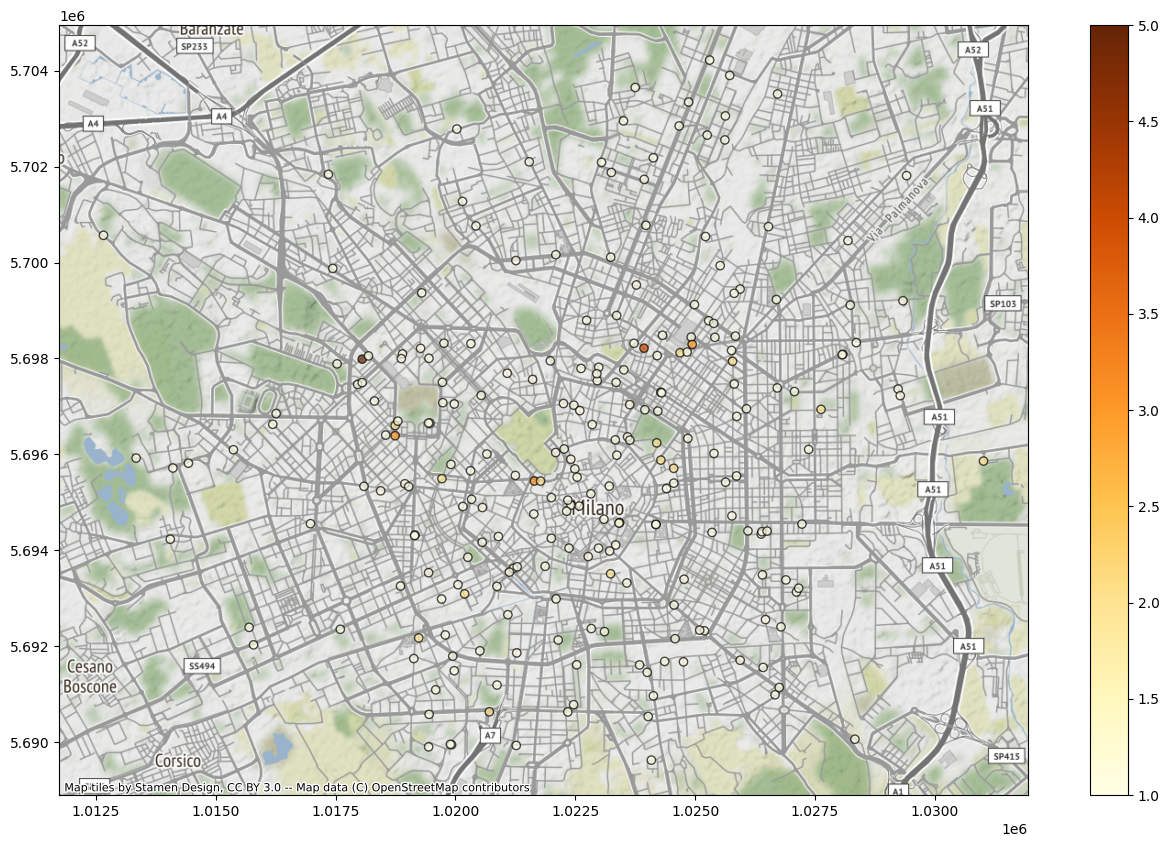

In [93]:
ax = join.to_crs(3857).plot(figsize=(16,10), legend = True,column="numero_col",cmap="YlOrBr", alpha = 0.7,edgecolor="k" )
ctx.add_basemap(ax)